# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [5]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

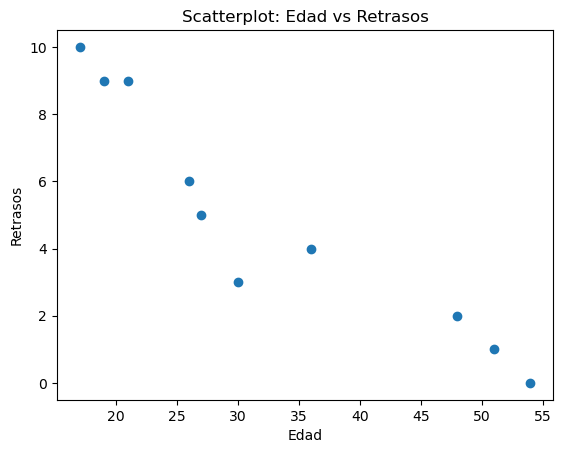

In [9]:
# Your code here
plt.scatter(student_data["Edad"], student_data["Retrasos"])
plt.xlabel("Edad")
plt.ylabel("Retrasos")
plt.title("Scatterplot: Edad vs Retrasos")
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [15]:
# your code here
#Calculamos la Covarianza
cov = np.cov(student_data["Edad"], student_data["Retrasos"])[0,1]
print("Covarianza:", cov)


Covarianza: -45.56666666666666


Indica que a medida que aumenta la edad, disminuye el número de retrasos. 

In [17]:
#Calculamos la correlación
corr = np.corrcoef(student_data["Edad"], student_data["Retrasos"])[0,1]
print("Correlación:", corr)

Correlación: -0.9391626886887122


#Indica una fuerte relación negativa, confirmando que los estudiantes mayores son más puntuales. 

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [45]:
# your explanation here

# Modelo de regresión lineal con statsmodels
modelo = smf.ols('Retrasos ~ Edad', data=student_data).fit()
print(modelo.summary())

# Predicción con el modelo
prediccion = modelo.predict(student_data['Edad'])


                            OLS Regression Results                            
Dep. Variable:               Retrasos   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           5.57e-05
Time:                        22:03:34   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

C:\Users\bader\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#En el modelo que hemos construido, estamos utilizando una regresión lineal simple para predecir el número de retrasos en función de la edad. El número de retrasos es nuestra variable de resultado, y la edad es nuestra variable predictora.

Grafica tu modelo de regresión en tu diagrama de dispersión.

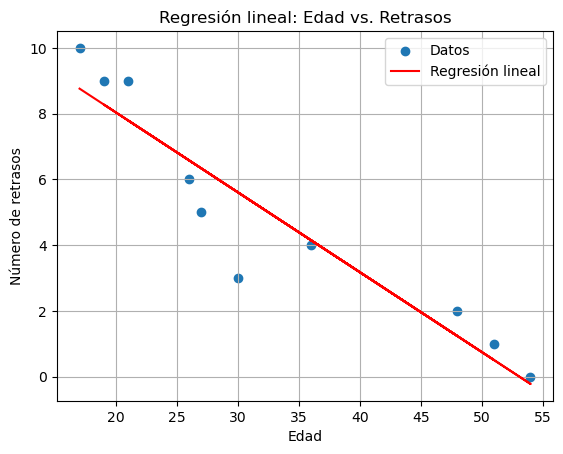

In [43]:
# Your code here.

# Predicciones
predicciones = modelo.predict(student_data['Edad'])

# Diagrama de dispersión con línea de regresión
plt.scatter(student_data['Edad'], student_data['Retrasos'], label='Datos')
plt.plot(student_data['Edad'], predicciones, color='red', label='Regresión lineal')
plt.xlabel('Edad')
plt.ylabel('Número de retrasos')
plt.title('Regresión lineal: Edad vs. Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

#El modelo sugiere una relación negativa y significativa entre la edad y el número de retrasos. Sí se puede decir que la edad es un buen predictor de la tardanza en este DF. 

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [52]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

In [54]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [66]:
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [62]:
# Seleccionar las columnas de interés
columnas_interes = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_interes = vehicles[columnas_interes]

# Calcular la matriz de correlación
correlacion = vehicles_interes.corr()

# Mostrar la matriz de correlación
print(correlacion)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

In [ ]:
#La variable más influyente en las emisiones de CO2 es la cantidad de combustible que consume el vehículo al año. Cuanto más se gaste, más emisiones.
#esto es por una correlación negativa muy fuerte. 

In [ ]:
#La variable que menos información útil nos proporciona es la del "Year". Lo correlación es débil. No es una relación ni directa ni lineal. 

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Seleccionar variables independientes (X) y variable dependiente (y)
X = vehicles_interes[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles_interes['CO2 Emission Grams/Mile']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo (por ejemplo, calculando el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 299.13453065738975


In [74]:
#He utilizado una regresión lineal múltiple para modelar la relación entre las variables y las emisiones de CO2. 

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [78]:
#Las variables más importantes siguen siendo Fuel Barrels/Years por tener la correlación más fuerte (cuanto más combustible se consume, más emisiones). 
#Los Cylinders también son importantes ya que el tamaño del motor influye en el consumo. Y Combined MPG ya que refleja la eficiencia del motor y el 
#vehículo. Son variables con relación causal, fuerza en su correlación y son fáciles de interpretar. 

In [ ]:
#La confianza en el modelo puede ser moderada, aunque partamos con una buena base para comprender la relación entre características y consumo, es 
#necesario hacer un análisis de los resultados y considerar limitaciones del modelo y la data.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*